(sec:data_exp)=

# Data exploration

&nbsp;&nbsp;&nbsp; The first step of this study wa to explore datasets get an idea of the distribution of individuals (pixels/TJ). We will start this exploration by looking at correlations matrix before apply a PCA an t-SNE algorithm.

(sec:corr_mat)=

## Data correlations


### Tabular dataset of pixels
&nbsp;&nbsp;&nbsp; The [Figure 2.10](fig:corr_mat_px) present the correlation matrix of the dataset of pixels detailed section {ref}`sec:expdata` and {ref}`sec:an_factors`, considering the 5 samples. We can notice that **RX** seams to be slightly uncorrelated with the variables **dist2GB** and **dist2TJ** inducing that RX appear much when distance to grain boundary and distance to triple junction decrease, that is consistent with the physical context. These two distance are much correlated because TJ are defined by grain boundaries. Another slight correlation is between **schmid**,**diff_schmid** and **mis_angle**, provided by the definition of these variables bases on $c$-axes. Among the CraFT data, we can make out lightly correlations between them and a big one between **work** and the others. It come from the formaulas defined section {ref}`sec:CraFT`. If we wanted to choose only one CraFT data, we could choose work to be representative of the 4 others. Looking at **anisotropy factors**, we can observe high correlations. We choosed in next parts sometimes to use only one of these factors, **volume ratio** , because it is correlated to th 3 others. We can also see an uncorrelation between **anisotropy factors** and **mis_angle** maybe because it is based on $c$-axes too. 

In [1]:
# HIDDEN

from matplotlib.colors import Colormap
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import sys
sys.path.append("../../scripts/")
import utils

from sklearn.decomposition import PCA
import plotly.express as px


In [18]:
# HIDDEN

# CI02 = utils.load_data("../../data/for_learning_plus/CI02.npy")
# CI04 = utils.load_data("../../data/for_learning_plus/CI04.npy")
# CI06 = utils.load_data("../../data/for_learning_plus/CI06.npy")
# CI09 = utils.load_data("../../data/for_learning_plus/CI09.npy")
# CI21 = utils.load_data("../../data/for_learning_plus/CI21.npy")

# X = pd.concat((CI02,CI04,CI06,CI09,CI21))
# X.rename(columns={'Y':'RX'},inplace=True)

# cmap = cm.bwr

# f = plt.figure(figsize=(10,10))
# plt.matshow(X.corr(),fignum=f.number,vmin=-1,vmax = 1,cmap=cmap)
# plt.xticks(range(X.shape[1]), X.columns, rotation=90)
# plt.yticks(range(X.shape[1]), X.columns)
# cb = plt.colorbar()
# plt.title('Correlation Matrix for pixel dataset', fontsize=16)
# plt.savefig("../../img/corr_mat_px.png",facecolor='w')
# plt.close()

:::{figure-md} fig:corr_mat_px
<img src="../../img/corr_mat_px.png" >

Correlation matrix of the inital dataset with anisotropy factors.
:::

### Tabular dataset of Triple Junctions

&nbsp;&nbsp;&nbsp; The [Figure 2.11](fig:corr_mat_tj) shows the correlation matrix of the TJ dataset detailled section {ref}`sec:TJ_dataset` for the 5 experiments. For this other dataset reffering only triple junction, we see some correlation already here in the previous dataset, like between anisotropy and mis_angles or between CraFT data. Other correlations are minors or between variables which have grain in common for their computation, like diff_schmid and mis_angle. We can note that **RX** seams to be not correlatated with any variable except with the size of grains but it seams to be negligeable.

In [3]:
# HIDDEN

# CI02 = utils.load_tj_data("../../data/TJ/TJ_CI02.npy")
# CI04 = utils.load_tj_data("../../data/TJ/TJ_CI04.npy")
# CI06 = utils.load_tj_data("../../data/TJ/TJ_CI06.npy")
# CI09 = utils.load_tj_data("../../data/TJ/TJ_CI09.npy")
# CI21 = utils.load_tj_data("../../data/TJ/TJ_CI21.npy")

# X = pd.concat((CI02,CI04,CI06,CI09,CI21))

# cmap = cm.bwr

# f = plt.figure(figsize=(10,10))
# plt.matshow(X.corr(),fignum=f.number,vmin=-1,vmax = 1,cmap=cmap)
# plt.xticks(range(X.shape[1]), X.columns, rotation=90)
# plt.yticks(range(X.shape[1]), X.columns)
# cb = plt.colorbar()
# plt.title('Correlation Matrix for TJ dataset', fontsize=16)
# plt.savefig("../../img/corr_mat_tj.png",facecolor='w')
# plt.close()

:::{figure-md} fig:corr_mat_tj
<img src="../../img/corr_mat_tj.png" >

Correlation matrix of the TJ dataset.
:::

(sec:PCA)=

## Principal Components Analysis (PCA)

&nbsp;&nbsp;&nbsp; **Principal Components Analysis** (PCA) is a linear dimension reduction algorithm frequently used in data analysis. We apply PCA in view to visualize the distribution of the data and evaluate if the population of recrystallized individuals was distinguishable from the not recrystallized population. PCA's algorithm is based on the least square method, used to calculate new coordinates for the individuals keeping a maximum of the explained variance on first principal components. These last one are linear combinations of the variables. More details in {cite:p}`Goodfellow-et-al-2016` (5.8.1) and in {cite:p}`acp2`.
PCA has a tendance to keep the distance ratio between individuals. PCA can also be used to identify a "batch effect" if we can see from which experiment come individuals on PCA's results. First apply PCA is a good practice to start reading data before applying other machine learning algorithms on.


(sec:PCA_px)=

### PCA on pixels dataset

&nbsp;&nbsp;&nbsp; We will first apply PCA on the inital data, then on data with anisotropy factors. The [Figure 2.12](fig:PCA_init_eigen_var) and the [Figure 2.13](fig:PCA_ann_eigen_var) represent the explained variance ratio of each principal component (PC) and the circle of correlation of the first and second principal plane with and without the 4 anisotropy factors. On each bar plot we can observe a knee at the third PC. We should consider 3 PC for this analysis. In correlation circles, we can see that in the two configurations, CraFT data an mostly work is well represented on 1st or 2nd PC and are on the same axis that induce that these variables are correlated in these PC and have a good weight on the explainable variance. We also observe that distances to GB and TJ are always closed and so correlated and very significant on the 2nd PC for the initial data. The positions of the anisotropy factors next to the circle on the 1st PC show that these variables have a role to play in the explanation of the variance. But considering the 3 first PC in the 2 cases, we have a cumulated variance ratio around $50 \%$ that is not much to have strong arguments.

:::{figure-md} fig:PCA_init_eigen_var
<img src="../../img/PCA_init_eigen_var.png" >

(left) Explained variance ratio of PCA on initial data. Circle of correlation of the variables on first (middle) and second (right) principal planes.
:::

:::{figure-md} fig:PCA_ann_eigen_var
<img src="../../img/PCA_ann_eigen_var.png" >

(left) Explained variance ratio of PCA on data with anisotropy factors. Circle of correlation of the variables on first (middle) and second (right) principal planes.
:::

&nbsp;&nbsp;&nbsp; Looking at the [Figure 2.14](fig:PCA_init_dm_l) and the [Figure 2.15](fig:PCA_ann_dm_l) representing the density map of the populations RX and no-RX in the first principal plane with and without anisotropy factors, we can observe, due to fixed window scaling, that the area of dispersion of the RX population is included into the area of the non-RX population. In other words, the two types of pixels are confused into their projection on PCA's space. For the others principal planes, observed the same phenomena. We chose this kind of representation because of the very large number of individuals and the low dispersion of these last. The habitual scatter plot was unreadable. This kind of results shows us that the classification problem will be hard to be done because of the similarity of the two classes.

&nbsp;&nbsp;&nbsp; We also checked the "batch effect" in the dataset with this PCA. The [Figure 2.16](fig:PCA_ann_dm_b) represents the density maps of the population from the 5 experiments in the first principal plane of the PCA with anisotropy factors. Window scale fixed allow us to compare the distribution area of the different pixels of the 5 samples. We can observe that sample **CI02** and **CI04** are similar on this first principal plane when the shape of **CI06** is more like the shape of **CI21**. The sample **CI09** seams to be really different from the others due to higher dispersion on the 2nd PC. Otherwise, the potions of the shapes in the plane are almost the same. So we can say that there is no visible batch effect that would have allowed to identify source sample of individuals because areas are almost confused. But the distribution of the samples are not the sample and can't really be considered as a unique source of data. We may have a test error on classification higher than if it was smooth (see {ref}`sec:pix_class`). Notebook corresponding to PCA for this dataset is available [here](ax:PCA_px).

:::{figure-md} fig:PCA_init_dm_l
<img src="../../img/PCA_init_dm_l.png" >

Density maps of individuals on first principal plane of PCA depending on RX for inital dataset
:::

:::{figure-md} fig:PCA_ann_dm_l
<img src="../../img/PCA_ann_dm_l.png" >

Density maps of individuals on first principal plane of PCA depending on RX for dataset with anisotropy factors
:::

:::{figure-md} fig:PCA_ann_dm_b
<img src="../../img/PCA_ann_dm_b.png" >

Density maps of individuals on first principal plane of PCA for each experiment on dataset with anisotropy factors
:::

(sec:PCA_TJ)=

### PCA on TJ dataset

&nbsp;&nbsp;&nbsp; When we changed the classification strategy and create the new dataset of the triple junction, we decided to apply PCA to visualize the new data and check batches ones again. The [Figure 2.17](fig:PCA_TJ_eigen_var) presents the explained variance ratio of each PC and the correlation circle of the 2 first principal planes. Looking at the knee of the bar plot, we should consider here 5 PC that is a lot. Even considering these 5 PC, the cumulated explainable variance is around $50\%$ so there is again hidden information that PCA can show us. Looking at the correlation circles, we observe correlations representation which recalls the previous section. Indeed, **work** and the other Craft data are well represented on 1st PC and correlated. This time **volume ratio** anisotropy and **mis_angles** contribute to the 2nd PC and we see the anti-correlation observed in {ref}`sec:corr_mat`.

&nbsp;&nbsp;&nbsp; The [Figure 2.18](fig:PCA_TJ_proj_l) represents TJ projected on the first principal plane colored by RX label. We can see this time again that the 2 populations are distributed in the same area. The other principal planes show similar results. The classification on TJ's is annonced harder as much as classification on pixels. Populations seem to be really similar in these datasets. 

&nbsp;&nbsp;&nbsp; This dataset seems to don't have a batch effect like we can observe on the [Figure 2.19](fig:PCA_TJ_proj_b) that shows the projection on the first principal plane colored by experiment. We can see that the different distributions of the samples seem to be the same, maybe a little bit shifted for the sample **CI21**. Another thing to note is that distribution areas are close to the origin of the plane what means that most of individuals are not well represented in the plane despite it is the one with the higher explainable variance ratio. PCA is exceeded and can't explain well the variance in this dataset. Notebook corresponding to this analysis is available [here](ax:PCA_TJ).

In [6]:
# HIDDEN

TJ_CI02 = utils.load_tj_data("../../data/TJ/TJ_CI02.npy").dropna()
TJ_CI04 = utils.load_tj_data("../../data/TJ/TJ_CI04.npy").dropna()
TJ_CI06 = utils.load_tj_data("../../data/TJ/TJ_CI06.npy").dropna()
TJ_CI09 = utils.load_tj_data("../../data/TJ/TJ_CI09.npy").dropna()
TJ_CI21 = utils.load_tj_data("../../data/TJ/TJ_CI21.npy").dropna()

TJ_CI02['batch'] = ['CI02'] * np.shape(TJ_CI02)[0]
TJ_CI04['batch'] = ['CI04'] * np.shape(TJ_CI04)[0]
TJ_CI06['batch'] = ['CI06'] * np.shape(TJ_CI06)[0]
TJ_CI09['batch'] = ['CI09'] * np.shape(TJ_CI09)[0]
TJ_CI21['batch'] = ['CI21'] * np.shape(TJ_CI21)[0]

data = pd.concat((TJ_CI02,TJ_CI04,TJ_CI06,TJ_CI09,TJ_CI21))

data['RX'] = data['RX'].astype(object)
data['batch'] = data['batch'].astype(object)
X = data.loc[:,((data.columns != 'RX')&(data.columns != 'batch'))] 
y = data['RX']
b = data['batch']

norm_X = (X - X.mean())/X.std()
pca = PCA()
res_pca  = pca.fit(norm_X)

components = pca.fit_transform(norm_X)

PCDf = pd.DataFrame(data = components
             , columns = ['PC 1', 'PC 2', 'PC 3', 'PC 4', 'PC 5','PC 6', 'PC 7', 'PC 8', 'PC 9', 'PC 10', 'PC 11', 'PC 12', 'PC 13', 'PC 14', 'PC 15', 'PC 16', 'PC 17', 'PC 18', 'PC 19'])

n = np.shape(norm_X)[0]
p = np.shape(norm_X)[1]
eigval = (n-1)/n*pca.explained_variance_
sqrt_eigval = np.sqrt(eigval)
corvar = np.zeros((p,p))
for k in range(p):
    corvar[:,k] = pca.components_[k,:] * sqrt_eigval[k]


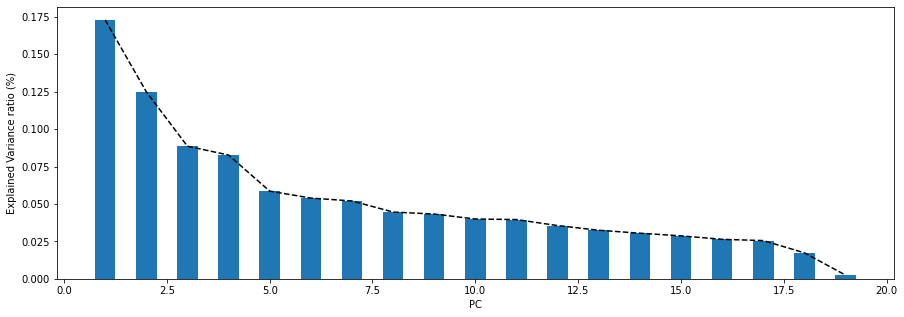

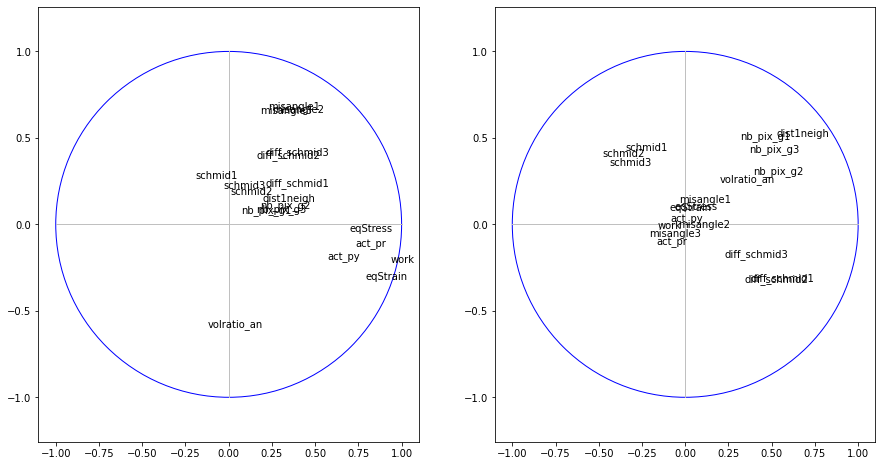

In [46]:
# NO CODE

plt.figure(figsize=(15,5))

plt.bar(np.linspace(1,19,19),res_pca.explained_variance_ratio_,width=0.5)
plt.plot(np.linspace(1,19,19),res_pca.explained_variance_ratio_,'--k')
plt.xlabel("PC")
plt.ylabel("Explained Variance ratio (%)")
plt.show()


plt.figure(figsize=(15,8))
ax = plt.subplot(121)

ax.set_xlim(-1,1)
ax.set_ylim(-1,1)

for j in range(p):
    plt.annotate(X.columns[j],(corvar[j,0],corvar[j,1]))

plt.plot([-1,1],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-1,1],color='silver',linestyle='-',linewidth=1)
circle = plt.Circle((0,0),1,color='blue',fill=False)
ax.add_artist(circle)
plt.axis("equal")

ax = plt.subplot(122)

ax.set_xlim(-1,1)
ax.set_ylim(-1,1)

for j in range(p):
    plt.annotate(X.columns[j],(corvar[j,2],corvar[j,3]))

plt.plot([-1,1],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-1,1],color='silver',linestyle='-',linewidth=1)
circle = plt.Circle((0,0),1,color='blue',fill=False)
ax.add_artist(circle)
plt.axis("equal")
plt.show()

:::{figure-md} fig:PCA_TJ_eigen_var
<img src="../../img/vide.png" >

(Up) Explained variance ratio of PCA on TJ dataset. Circles of correlation of vraiables on first (down left) and second (down right) principal planes.
:::

In [47]:
# NO CODE

fig = px.scatter(PCDf[["PC 1","PC 2"]], x='PC 1', y='PC 2', color=y)

fig.update_layout(
    xaxis_title=f"PC 1 ({(pca.explained_variance_ratio_[0] * 100):.1f}%)",
    yaxis_title=f"PC 2 ({(pca.explained_variance_ratio_[1] * 100):.1f}%)",
    width = 700,
    height = 700
)

:::{figure-md} fig:PCA_TJ_proj_l
<img src="../../img/vide.png" >

Projection of individials of TJ dataset on PCA's first principal plan colored by RX
:::

In [48]:
# NO CODE

fig = px.scatter(PCDf[["PC 1","PC 2"]], x='PC 1', y='PC 2', color=b)

fig.update_layout(
    xaxis_title=f"PC 1 ({(pca.explained_variance_ratio_[0] * 100):.1f}%)",
    yaxis_title=f"PC 2 ({(pca.explained_variance_ratio_[1] * 100):.1f}%)",
    width = 700,
    height = 700
)

:::{figure-md} fig:PCA_TJ_proj_b
<img src="../../img/vide.png" >

Projection of individials of TJ dataset on PCA's first principal plan colored by experiment 
:::

(sec:tsne)=

## T-Stochastic Neighbor Embleding (t-SNE)

&nbsp;&nbsp;&nbsp; To reinforce the results of the PCA, I chose to apply **t-SNE** algorithm ({cite:p}`tsne`), another dimension reduction method. The goal of t-SNE is to make a projection of data on a 2-dimensional space applying a non-linear transformation based on similarities of individuals. 
Indeed, on the first step, the algorithm will calculate the similarities on the large dimensional space by centering a normal distribution density around each individual and calculate the conditional probabilities of other points referring to this Gaussian distribution, that correspond to similarities between individuals. After that, the algorithm makes a random projection of individuals on the 2-dimensional space and calculate the conditional probabilities on this space but considering a Student distribution instead of normal distribution. A gradient descent is next applied on the Kullback_Leibler measure, allowing to compare conditional probabilities, to minimize the difference between the initial similarities and those of the projection to give a reduced space that keeps as best similarities between individuals. 

&nbsp;&nbsp;&nbsp; Parameters to consider in this algorithm are the **perplexity** corresponding to the number of neighbors to consider around each individual that will affect variance of the distributions, and the **number of iterations** of the gradient descent that permits to manage computation time and precision of the projection. In fact, t-SNE's projection tries to conserve distance between the nearest individuals when PCA tries to conserve global distances between individuals.

&nbsp;&nbsp;&nbsp; The [Figure 2.20](fig:tsne_1) and [Figure 2.21](fig:tsne_2) represents the results of the t-SNE algorithm respectively on CI02 pixel dataset with anisotropy factors and TJ dataset of the 5 samples. On that first figure, we can see that individuals are for the majority stacked in the center that could incite to increase the number of iterations find a better solution of the minimization problem. But the computation time was already of several hours due to the large number of pixels of the pictures and our wanted information is already observable. Indeed, blue points representing RX pixels are not regrouped as we could wish. They are scattered on several groups and sparse points that assure large differences of similarities between RX points. In other words, RX points are not enough similar to be distinguished from not RX points by t-SNE algorithm considering the similarities of neighbours in the large dimensional-space. This result tells us that classification based on neighbours will not work as well as we want (see {ref}`sec:knn`). 

&nbsp;&nbsp;&nbsp; On the [Figure 2.21](fig:tsne_2), we can observe the same problem on the TJ dataset. Even if individuals are well parsed due to the high number of iterations, RX triple junctions are not regrouped in the t-SNE projection. The similarities between RX and not RX triple junctions are too close to be separated on the projection. 

:::{figure-md} fig:tsne_1
<img src="../../img/TSNE_CI02_an_p30_i300.png" >

t-SNE projection of CI02 dataset with anisotropy factors colored by label (perplexity $= 30$, iterations $= 300$)
:::

:::{figure-md} fig:tsne_2
<img src="../../img/TSNE_TJ.png" >

t-SNE projection of TJ dataset colored by label (perplexity $= 10$, iterations $= 2000$)
:::

&nbsp;&nbsp;&nbsp; Notebook to use t-SNE algorithm is available [here](ax:TSNE).

(sec:threshold)=

## Pixel threshold

&nbsp;&nbsp;&nbsp; The proportion of RX pixels in the initial dataset is very low (see [Table 2.1](tab:compare)). In view to reduce the unbalance, we tried to find threshold on variables to exclude some pixels that are sure that they can't be recrystallized, like too far of the grain boundaries. After doing a descriptive analysis of each variable, we choose found only two variables that can be thresholded to move out some non-RX pixels without losing many RX pixels. The established threshold used in the next sections to try to improve results of classification methods is defined by :

$$
    2 \times dist2GB + dist2TJ < 60
$$

&nbsp;&nbsp;&nbsp; The [Figure 2.22](fig:thresh) represent this threshold on the pixels of the 5 samples represented by *dist2TJ* in function of *dist2GB*, colored by the label of RX. The thresholded dataset will be named as **"sub-dataset"** in the next sections. This sub-dataset has a little higher proportion of RX pixels, $9.45 \%$ for the 5 pictures although that $38 \%$ of non-RX pixels are out. Corresponding notebook is available [here](ax:threshold).

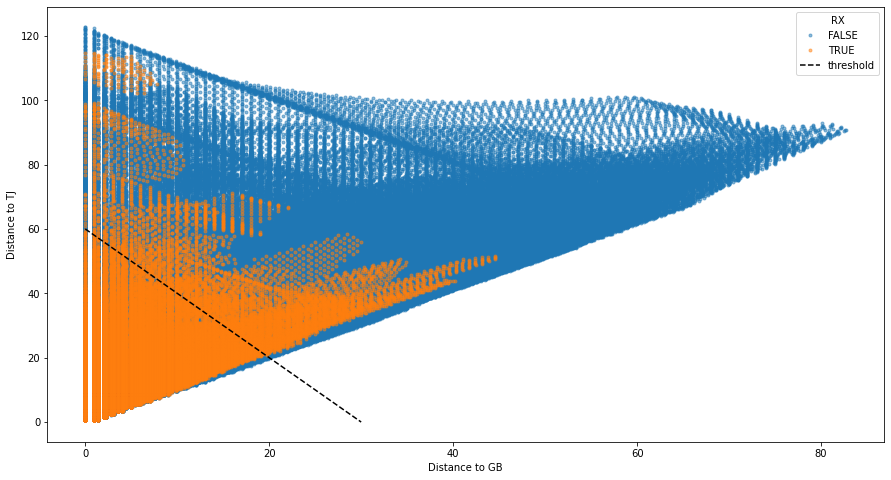

In [11]:
# NO CODE

CI02 = utils.load_data("../../data/for_learning_plus/CI02.npy")
CI04 = utils.load_data("../../data/for_learning_plus/CI04.npy")
CI06 = utils.load_data("../../data/for_learning_plus/CI06.npy")
CI09 = utils.load_data("../../data/for_learning_plus/CI09.npy")
CI21 = utils.load_data("../../data/for_learning_plus/CI21.npy")

data = pd.concat((CI02,CI04,CI06,CI09,CI21))
data['Y'] = data['Y'].astype(object)

plt.figure(figsize=(15,8))
plt.plot(data.loc[(data.Y==0),"dist2GB"],data.loc[(data.Y==0),"dist2TJ"],'.',alpha=0.5)
plt.plot(data.loc[(data.Y==1),"dist2GB"],data.loc[(data.Y==1),"dist2TJ"],'.',alpha=0.5)
plt.plot([0,30],[60,0],"--k")
plt.legend(["FALSE",'TRUE',"threshold"],title="RX")
plt.xlabel("Distance to GB")
plt.ylabel("Distance to TJ")
plt.show()

:::{figure-md} fig:thresh
<img src="../../img/vide.png" >

Distance to TJ in function of distance to GB of the 5 samples colored by RX label with threshold
:::